# Faisons une seconde classification 

0. Importez les librairies usuelles 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1. Téléchargez le fichier ```ex2data2.txt``` et chargez ces données dans un dataframe

In [2]:
from google.colab import files

uploaded = files.upload()

Saving ex2data2.txt to ex2data2.txt


In [0]:
for fn in uploaded.keys():
  dataset= pd.read_csv(fn, header=None)

In [7]:
dataset.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


2. Renommez respectivement les colonnes : 

```Col_1``` / ```Col_2``` / ```Target```

In [8]:
dataset = dataset.rename(columns={0:"Col_1",
                       1: "Col_2",
                       2: "Target"})

dataset.head()

,Col_1,Col_2,Target
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


3. Visualisez les données dans un graph en deux dimensions, que constatez vous ? A votre avis la regression logistique pourra t elle classer correctement ces données ?

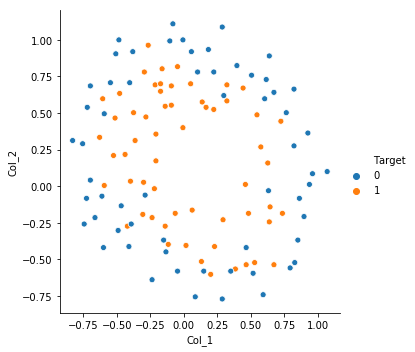

In [9]:
sns.relplot(
     x=dataset.columns[0],
     y=dataset.columns[1],
     data = dataset,
     hue=dataset.columns[-1])

---> Par rapport à la première régression logistique, on va avoir plus de mal de faire de bonnes classifications avec cet algorithme car les données sont mélangées. 

4. Tentez de créer tout de même la classification avec la régression logistique. Regardez un cross_val_score 

In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify =y)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)
X = sc_x.fit_transform(X)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

classifier = LogisticRegression()
cross_val_score(classifier, X, y, cv=10).mean()

0.2121212121212121

5. Regardez la courbe ROC au cas où

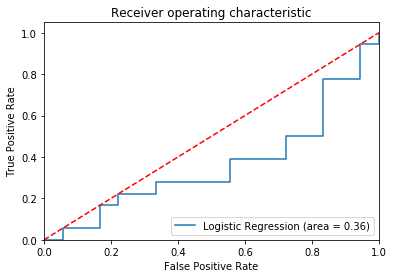

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

6. Utilisez la fonction suivante pour ajouter des variables explicatives a votre dataset, quelles seront les formules mathématiques des variables produites?

In [0]:
def map_feature(X1, X2):
    degree = 6
    Out = np.ones(len(X1))

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            tmp = np.power(X1, i - j) * np.power(X2, j)
            Out = np.vstack((Out, tmp))
    return Out.T

In [55]:
new_features = map_feature(X[:,0], X[:, 1])
new_features

array([[ 1.00000000e+00, -7.10129423e-03,  9.97918051e-01, ...,
         5.00097323e-05, -7.02767875e-03,  9.87573146e-01],
       [ 1.00000000e+00, -2.98296321e-01,  9.69668805e-01, ...,
         7.86664387e-02, -2.55720189e-01,  8.31267009e-01],
       [ 1.00000000e+00, -5.42901033e-01,  9.83793428e-01, ...,
         2.76094022e-01, -5.00311232e-01,  9.06616257e-01],
       ...,
       [ 1.00000000e+00, -1.09035391e+00,  1.57702761e+00, ...,
         7.35346716e+00, -1.06356483e+01,  1.53828137e+01],
       [ 1.00000000e+00, -1.23578900e-01,  1.57702761e+00, ...,
         9.44595429e-02, -1.20542671e+00,  1.53828137e+01],
       [ 1.00000000e+00,  1.16849077e+00, -4.12944396e-01, ...,
         3.97024110e-02, -1.40308238e-02,  4.95849019e-03]])

7. Stockez ces valeurs dans un dataframe

In [65]:
new_features.shape[1]

28

In [66]:
["col_{}".format(i) for i in range(0, new_features.shape[1])]

['col_0',
 'col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'col_14',
 'col_15',
 'col_16',
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25',
 'col_26',
 'col_27']

In [68]:
new_dataset = pd.DataFrame(columns=["new_col_{}".format(i) for i in range(0, new_features.shape[1])], data=[item for item in new_features])
new_dataset.head()

,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5,new_col_6,new_col_7,new_col_8,new_col_9,...,new_col_18,new_col_19,new_col_20,new_col_21,new_col_22,new_col_23,new_col_24,new_col_25,new_col_26,new_col_27
0,1.0,-0.007101,0.997918,0.000050,-0.007087,0.995840,-3.581068e-07,0.000050,-0.007072,0.993767,...,0.000050,-0.007042,0.989634,1.282405e-13,-1.802115e-11,2.532444e-09,-3.558747e-07,0.000050,-0.007028,0.987573
1,1.0,-0.298296,0.969669,0.088981,-0.289249,0.940258,-2.654261e-02,0.086282,-0.280475,0.911738,...,0.081127,-0.263719,0.857269,7.045104e-04,-2.290145e-03,7.444550e-03,-2.419992e-02,0.078666,-0.255720,0.831267
2,1.0,-0.542901,0.983793,0.294742,-0.534102,0.967850,-1.600155e-01,0.289965,-0.525446,0.952164,...,0.280642,-0.508553,0.921551,2.560495e-02,-4.639885e-02,8.407957e-02,-1.523610e-01,0.276094,-0.500311,0.906616
3,1.0,-0.869039,0.616553,0.755229,-0.535809,0.380138,-6.563239e-01,0.465639,-0.330355,0.234375,...,0.177007,-0.125580,0.089095,4.307611e-01,-3.056101e-01,2.168197e-01,-1.538261e-01,0.109134,-0.077427,0.054932
4,1.0,-1.148589,0.545930,1.319257,-0.627049,0.298040,-1.515285e+00,0.720222,-0.342325,0.162709,...,0.214655,-0.102026,0.048494,2.296088e+00,-1.091342e+00,5.187201e-01,-2.465502e-01,0.117187,-0.055699,0.026474


8. Ajoutez une nouvelle colonne qui contient la variable cible 

In [69]:
new_dataset = pd.concat([new_dataset, dataset], axis=1)
new_dataset.head()

,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5,new_col_6,new_col_7,new_col_8,new_col_9,...,new_col_21,new_col_22,new_col_23,new_col_24,new_col_25,new_col_26,new_col_27,Col_1,Col_2,Target
0,1.0,-0.007101,0.997918,0.000050,-0.007087,0.995840,-3.581068e-07,0.000050,-0.007072,0.993767,...,1.282405e-13,-1.802115e-11,2.532444e-09,-3.558747e-07,0.000050,-0.007028,0.987573,0.051267,0.69956,1
1,1.0,-0.298296,0.969669,0.088981,-0.289249,0.940258,-2.654261e-02,0.086282,-0.280475,0.911738,...,7.045104e-04,-2.290145e-03,7.444550e-03,-2.419992e-02,0.078666,-0.255720,0.831267,-0.092742,0.68494,1
2,1.0,-0.542901,0.983793,0.294742,-0.534102,0.967850,-1.600155e-01,0.289965,-0.525446,0.952164,...,2.560495e-02,-4.639885e-02,8.407957e-02,-1.523610e-01,0.276094,-0.500311,0.906616,-0.213710,0.69225,1
3,1.0,-0.869039,0.616553,0.755229,-0.535809,0.380138,-6.563239e-01,0.465639,-0.330355,0.234375,...,4.307611e-01,-3.056101e-01,2.168197e-01,-1.538261e-01,0.109134,-0.077427,0.054932,-0.375000,0.50219,1
4,1.0,-1.148589,0.545930,1.319257,-0.627049,0.298040,-1.515285e+00,0.720222,-0.342325,0.162709,...,2.296088e+00,-1.091342e+00,5.187201e-01,-2.465502e-01,0.117187,-0.055699,0.026474,-0.513250,0.46564,1


9. Refaites une visualisation des nouvelles variables par rapport à votre cible ?

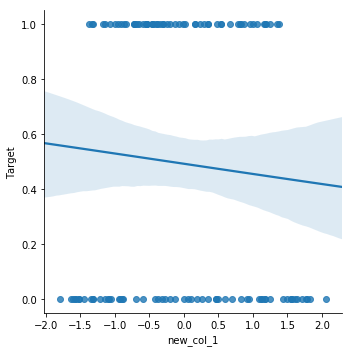

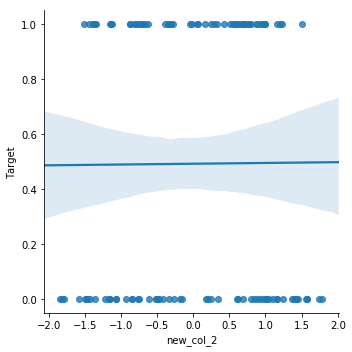

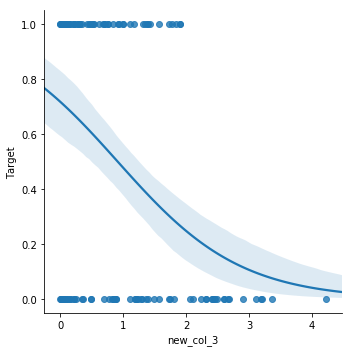

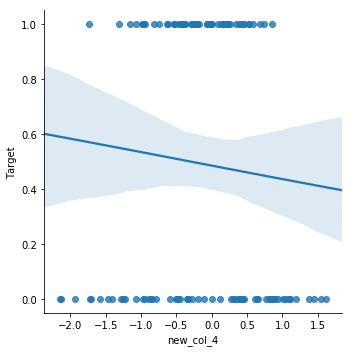

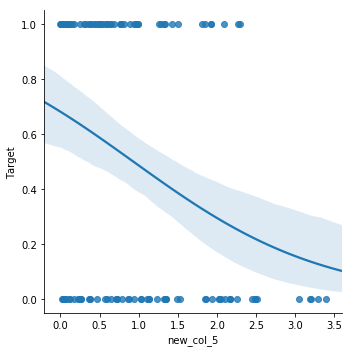

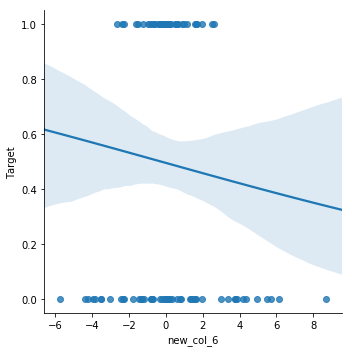

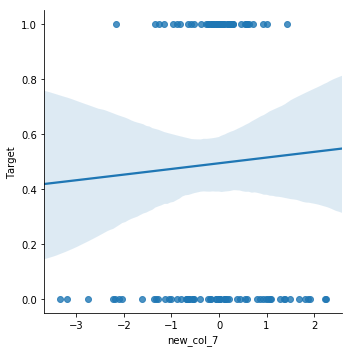

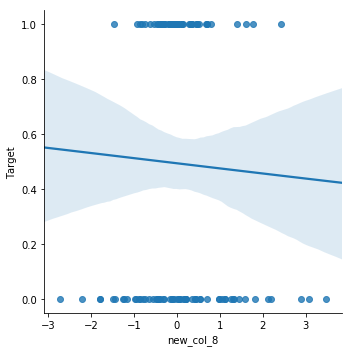

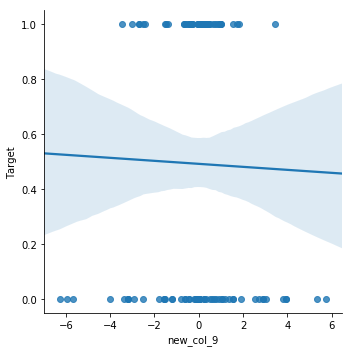

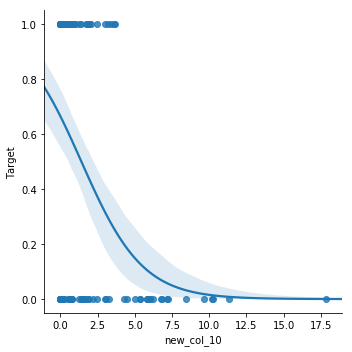

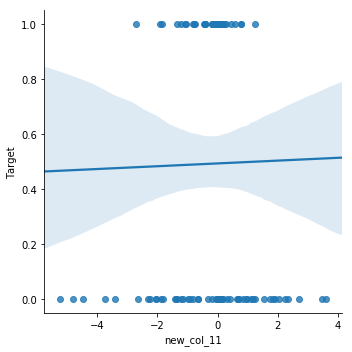

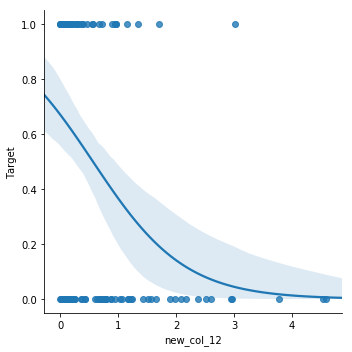

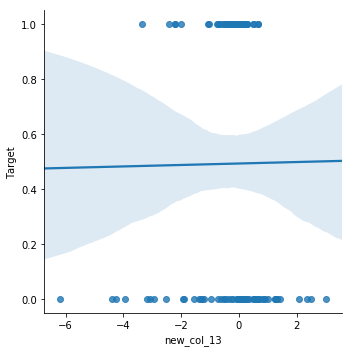

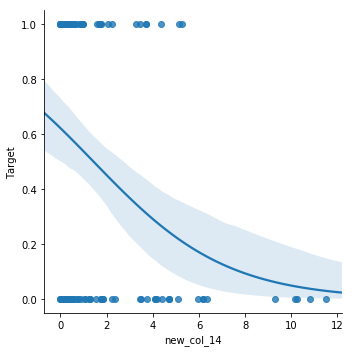

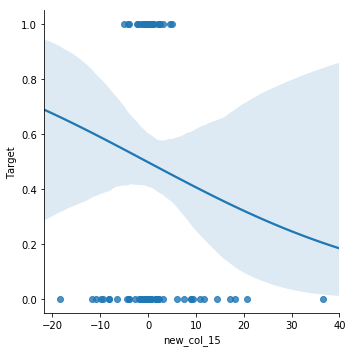

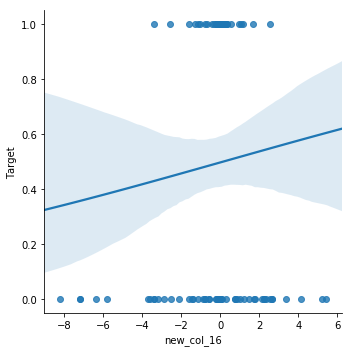

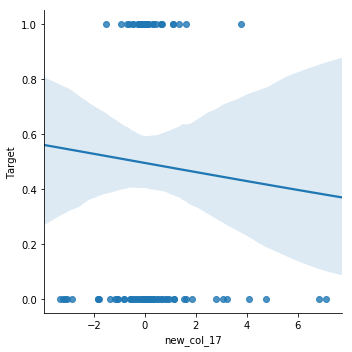

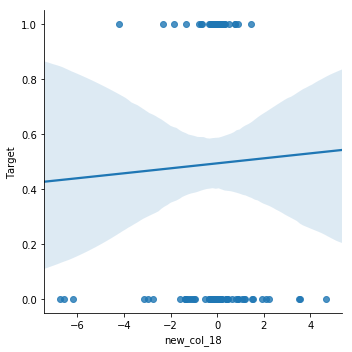

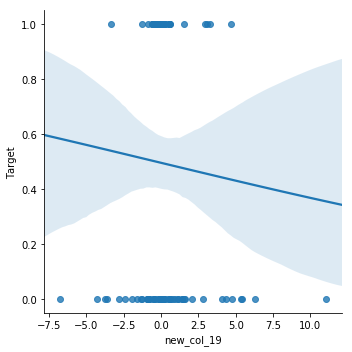

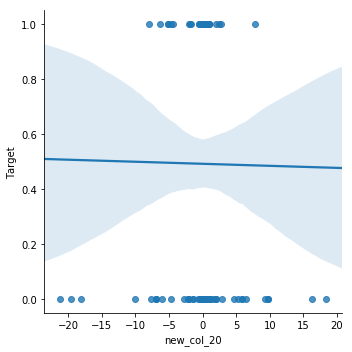

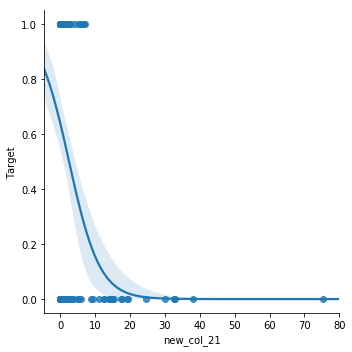

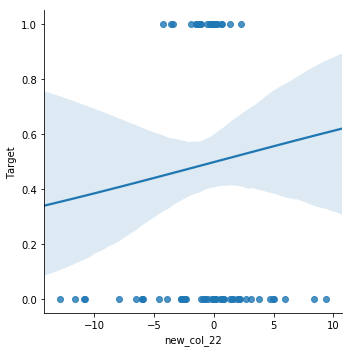

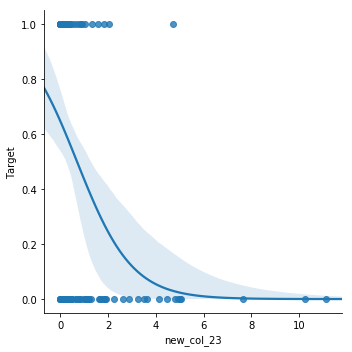

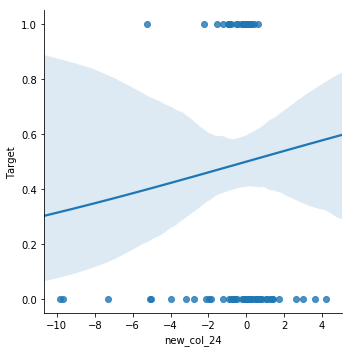

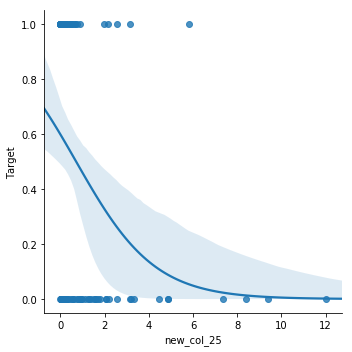

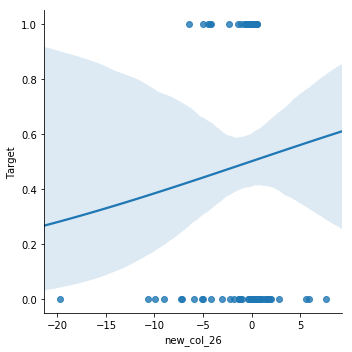

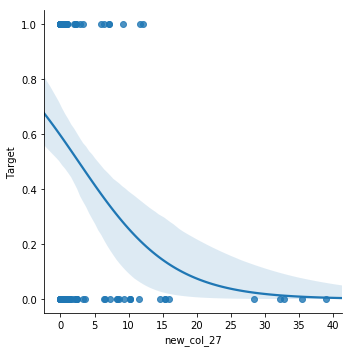

In [75]:
for i in range(1, 28):
  sns.lmplot(x=new_dataset.columns[i], y=new_dataset.columns[-1], data =new_dataset, logistic=True)

10. Utilisez la fonction suivante pour tracer l’allure de la frontière entre les deux classes en fonction des variables originelles du dataset :

```
  import numpy as np
  import matplotlib.pyplot as plt

  def plot_decision_boundary(theta, X, y):
      """
      Plots the data points X and y into a new figure with the decision boundary defined by theta.
      Parameters
      ----------
      theta : ndarray, shape (n_features,)
          Linear regression parameter.
      X : ndarray, shape (n_samples, n_features)
          Training data, where n_samples is the number of samples and n_features is the number of features.
      y : ndarray, shape (n_samples,)
          Labels.
      """
      if X.shape[1] <= 3:
          plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
          plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
          plt.plot(plot_X, plot_y)
      else:
          u = np.linspace(-1, 1.5, 50)
          # u.resize((len(u), 1))
          v = np.linspace(-1, 1.5, 50)
          # v.resize((len(v), 1))
          z = np.zeros((len(u), len(v)))
          for i in range(len(u)):
              for j in range(len(v)):
                  z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
          z = z.T
          u, v = np.meshgrid(u, v)
          cs = plt.contour(u, v, z, levels=[0])
          fmt = {}
          strs = ['Decision boundary']
          for l, s in zip(cs.levels, strs):
              fmt[l] = s

          plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)
```

In [0]:
  import numpy as np
  import matplotlib.pyplot as plt

  def plot_decision_boundary(theta, X, y):
      """
      Plots the data points X and y into a new figure with the decision boundary defined by theta.
      Parameters
      ----------
      theta : ndarray, shape (n_features,)
          Linear regression parameter.
      X : ndarray, shape (n_samples, n_features)
          Training data, where n_samples is the number of samples and n_features is the number of features.
      y : ndarray, shape (n_samples,)
          Labels.
      """
      
      if X.shape[1] <= 3:
          plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
          plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
          plt.plot(plot_X, plot_y)
      else:
          u = np.linspace(-1, 1.5, 50)
          # u.resize((len(u), 1))
          v = np.linspace(-1, 1.5, 50)
          # v.resize((len(v), 1))
          z = np.zeros((len(u), len(v)))
          for i in range(len(u)):
              for j in range(len(v)):
                  z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
          z = z.T
          u, v = np.meshgrid(u, v)
          cs = plt.contour(u, v, z, levels=[0])
          fmt = {}
          strs = ['Decision boundary']
          for l, s in zip(cs.levels, strs):
              fmt[l] = s

          plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)


In [0]:
X =  new_dataset.iloc[:, :-1]
y = new_dataset.iloc[:, -1]

In [96]:
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
plot_decision_boundary(classifier.coef_,X, y)

ValueError: ignored

In [94]:
classifier.coef_

array([[ 0.04997182, -0.09549699]])